<a href="https://colab.research.google.com/github/tomoharukawamura/python/blob/master/%E3%83%AC%E3%83%9D%E3%83%BC%E3%83%886.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
x_axis=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
x_axis_test=np.linspace(0.1,1.0,1000)
y=[
    0.08311894,
    0.100367,
    0.107784,
    0.0198079,
    0.219709,
    0.280256,
    0.254182,
    0.471638,
    0.771075,
    0.976337
]

In [84]:
def calc_inverse_matrix(n,A):
  B=np.eye(n)
  for j in range(0,n,1):
    for i in range(j+1,n,1):
      coe = -A[i][j]/A[j][j]
      for k in range(n):
        A[i][k]+=coe*A[j][k]
        B[i][k]+=coe*B[j][k]
  for j_2 in range(n-1,0,-1):
    for i_2 in range(j_2-1,-1,-1):
      coe_2 = -A[i_2][j_2]/A[j_2][j_2]
      for k_2 in range(n):
        B[i_2][k_2]+=coe_2*B[j_2][k_2]
  for i_3 in range(n):
    for j_3 in range(n):
      B[i_3][j_3]=B[i_3][j_3]/A[i_3][i_3]
  return B

# n*n行列Aを生成
# nはサンプルデータの数
def create_A(n,num):
    res=np.zeros((n,n))
    x_axis_1=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
    if n!=10:
      x_axis_1.pop(num)
    for j in range(n):
        for i in range(n):  
            res[j][i]+=x_axis[j]**i
    return res

def calc_c_1(n):
    A=create_A(n,0)
    trans_A=A.T
    inv_mat=calc_inverse_matrix(n,trans_A@A)
    return inv_mat@(trans_A@np.array(y))

def draw_graph(data,x):
    res=[]
    for i in range(len(x)):
        tmp=0
        for j in range(len(data)):
            tmp+=data[j]*(x[i]**j)
        res.append(tmp)
    plt.plot(x,res)

[ 1.74804599e+01 -4.56613235e+02  4.70331354e+03 -2.54782676e+04
  8.12873770e+04 -1.60485480e+05  1.98214398e+05 -1.49009484e+05
  6.23282422e+04 -1.11200117e+04]


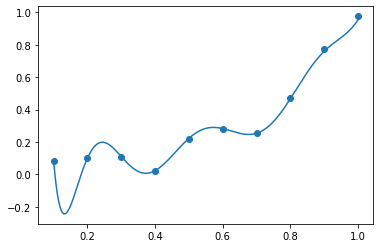

In [29]:
data_1=calc_c_1(10)
print(data_1)
draw_graph(data_1,x_axis_test)
plt.scatter(x_axis,y)

In [67]:
mat=create_A(10,0)
trans_A=mat.T

In [104]:
from locale import ABDAY_5
def softthreshold(c,lam):
    res=[]
    for elem in c:
        if elem>lam:
            res.append(elem-lam)
        elif elem<-lam:
            res.append(elem+lam)
        else:
            res.append(0)
    return np.array(res)

def calc_c_2(c,lamb,y,A,A_t):
    diff=1
    times=0
    err=1e-5
    alpha=0.001
    while diff>err:
        times+=1
        g=A_t@(A@c-np.array(y))
        c_t=c-alpha*g
        c_pre=c
        c=softthreshold(c_t,alpha*lamb)
        diff=np.linalg.norm(c-c_pre)/np.linalg.norm(c_pre)
    print(times)
    return c

42354
[ 0.07723035 -0.02967722  0.17210165  0.24843324  0.2421198   0.197142
  0.13388935  0.06134054 -0.0138471  -0.08950009]


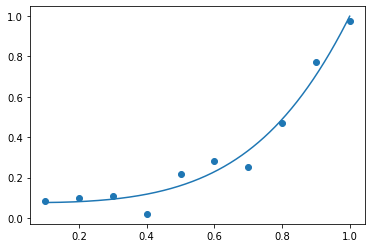

In [105]:
c_1=np.ones(10)
data_2=calc_c_2(c_1,0.0001,y,mat,trans_A)
print(data_2)
draw_graph(data_2,x_axis_test)
plt.scatter(x_axis,y)

34910
[0.06985741 0.         0.17893281 0.23741312 0.21936363 0.16697087
 0.09962605 0.02574027 0.         0.        ]


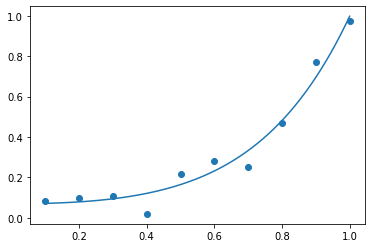

In [106]:
c_2=np.ones(10)
data_2=calc_c_2(c_2,0.01,y,mat,trans_A)
print(data_2)
draw_graph(data_2,x_axis_test)
plt.scatter(x_axis,y)

15076
[0.02093087 0.37761421 0.         0.         0.         0.
 0.         0.         0.         0.        ]


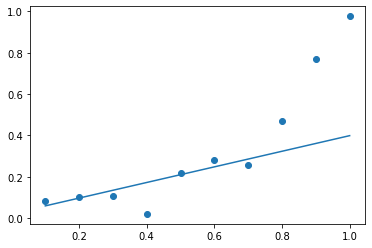

In [107]:
c=np.ones(10)
data_2=calc_c_2(c,1.0,y,mat,trans_A)
print(data_2)
draw_graph(data_2,x_axis_test)
plt.scatter(x_axis,y)

In [110]:
def calc_3(lam):
  err=0
  for i in range(10):
    c_0=np.ones(9)
    mat_2=create_A(9,i)
    trans_mat_2=mat_2.T
    y_base=[
      0.08311894,
      0.100367,
      0.107784,
      0.0198079,
      0.219709,
      0.280256,
      0.254182,
      0.471638,
      0.771075,
      0.976337
    ]
    y_test=y_base.pop(i)
    c_vec=calc_c_2(c_0,lam,y_base,mat_2,trans_mat_2)
    internal_err=0
    for j in range(len(c_vec)):
      internal_err+=c_vec[j]*(0.1*(i+1))**j
    diff=abs(internal_err-y_test)
    err+=diff
  return err/10

In [111]:
result=calc_3(0.0001)
print(result)

53926
42659
41755
22389
73262
75702
75736
29108
12201
17537
0.11469021829833662


In [112]:
result=calc_3(0.01)
print(result)

63875
65985
65974
64223
52897
46520
49130
46303
10336
20194
0.10550993890901954


In [113]:
result=calc_3(1.0)
print(result)

8381
8444
8464
8258
8547
8582
8583
8353
4031
1416
0.21299729583768148
